# Welcome to my non-linear SVM practice!

##### Importing libraries

In [1]:
from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
% matplotlib inline

##### Generating the train data

In [2]:
X_train, y_train = make_circles(n_samples=100, shuffle=True, noise=0.2, random_state=42, factor=0.1)

##### Plotting the data

Text(0.5,1,'Training Points')

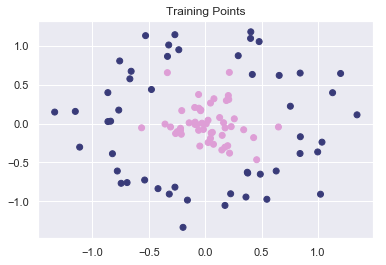

In [3]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='tab20b')
plt.title('Training Points')

##### Generating the test data 

In [4]:
X_test, y_test = make_blobs(n_samples=50, centers=1, n_features=2, 
                            random_state=6, cluster_std=.6, center_box=(.1,.1))

##### Plotting all the data

Text(0.5,1,'Training and Test Points')

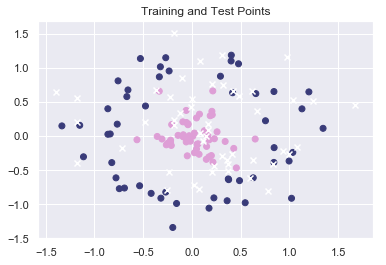

In [5]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='tab20b')
plt.scatter(X_test[:, 0], X_test[:, 1], c='White', marker='x')
plt.title('Training and Test Points')

##### Fitting the model

In [6]:
clf = SVC(C=1e8, kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=100000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

##### Making predictions

In [7]:
y_pred = clf.predict(X_test)

##### Plotting the results

Text(0.5,1,'Training and (Labeled) Test Points')

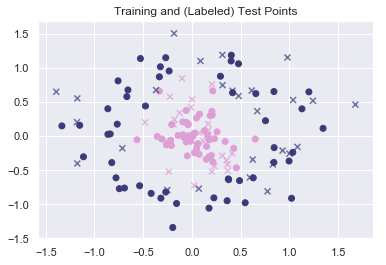

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='tab20b')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', cmap='tab20b', alpha=0.7)
plt.title('Training and (Labeled) Test Points')

##### Plotting the decision function

Taken from Jake VanderPlas (github.com/jakevdp/)

In [23]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

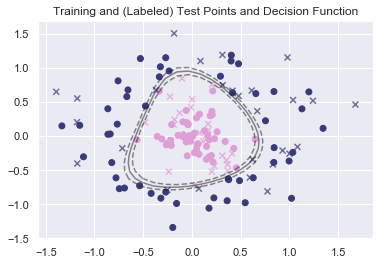

In [10]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='tab20b')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', cmap='tab20b', alpha=0.7)
plt.title('Training and (Labeled) Test Points and Decision Function')
plot_svc_decision_function(clf)

Is the SVM classifier correctly classifying the data?

In [24]:
confusion_matrix(y_train, clf.predict(X_train))

array([[50,  0],
       [ 1, 49]], dtype=int64)

Perfect!

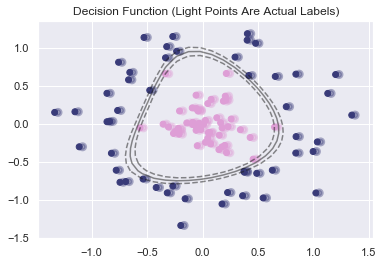

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=clf.predict(X_train), cmap='tab20b')
plt.scatter(X_train[:, 0] + 0.03, X_train[:, 1], c=y_train, cmap='tab20b', alpha=0.4, linewidths=3)
plt.title('Decision Function (Light Points Are Actual Labels)')
plot_svc_decision_function(clf)

Let's use GridSearchCV to find the best SVM parameters.

##### Using GridSearchCV to find the best parameters

In [13]:
clf.get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [14]:
param_grid = {'C':np.arange(1, 100, 4), 'gamma':np.arange(0.0001, 1, 0.05)}
grid = GridSearchCV(clf, param_grid)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'C': 1, 'gamma': 0.5501}


##### Re-running with optimal parameters

In [15]:
clf = grid.best_estimator_
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5501, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

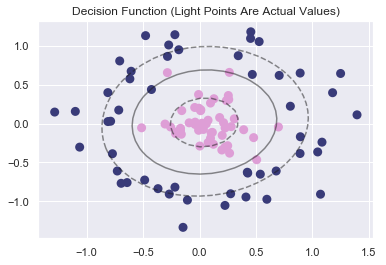

In [16]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='tab20b', linewidths=3)
plt.title('Decision Function (Light Points Are Actual Values)')
plot_svc_decision_function(clf)

We can see a blue point inside the circle, so it is a 'soft' boundary (it allows transgressions, as the 'C' parameter implies). Now, let's explore the support vectors, which determine the margins.

##### Support vectors

In [17]:
clf.support_vectors_[:5]

array([[ 0.62974996, -0.61018282],
       [ 0.37738239, -0.63698396],
       [-0.83819947,  0.03126708],
       [ 0.84405962, -0.16877927],
       [-0.66753076,  0.57740171]])

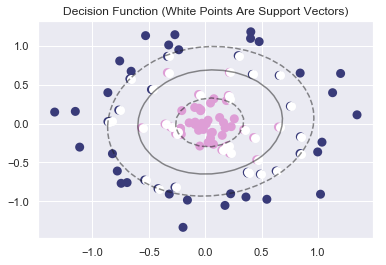

In [20]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='tab20b', linewidths=3)
plt.scatter(clf.support_vectors_[:, 0]+.01, clf.support_vectors_[:, 1], c='white', linewidths=3)
plt.title('Decision Function (White Points Are Support Vectors)')
plot_svc_decision_function(clf)

Is the SVM classifier correctly classifying the train data?

In [22]:
confusion_matrix(y_train, clf.predict(X_train))

array([[50,  0],
       [ 1, 49]], dtype=int64)

The grid search failed us! However, it is important to consider that this model, even though imperfect, is more generalizable to new data. 

##### Re-running the test points

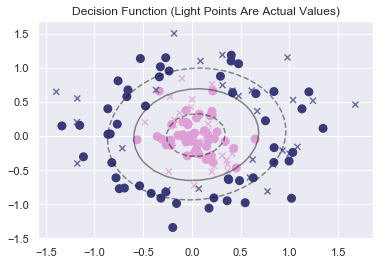

In [19]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='tab20b', linewidths=3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', cmap='tab20b', alpha=0.7)
plt.title('Decision Function with Test Points')
plot_svc_decision_function(clf)